<a href="https://colab.research.google.com/github/NooredeenAjaj/Home-Safety-Monitoring/blob/main/lec4_iris_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression multiclass case
We will look on the classic IRIS data set, and construct a classifier for all 3 iris classes based on sepal length (feature 0)


In [12]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
iris = load_iris()
print("size of data {}\nnames of columns {}\ntarget label size {}\nlabel names {}".format(iris.data.shape, iris.feature_names, iris.target.shape, iris.target_names))
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df)


size of data (150, 4)
names of columns ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target label size (150,)
label names ['setosa' 'versicolor' 'virginica']
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.

## Pandas
Now we want to use pandas dataframes to explore the data a bit. Lets create a dataframe for the data and the labels and then join them together so we have everything in one spot.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

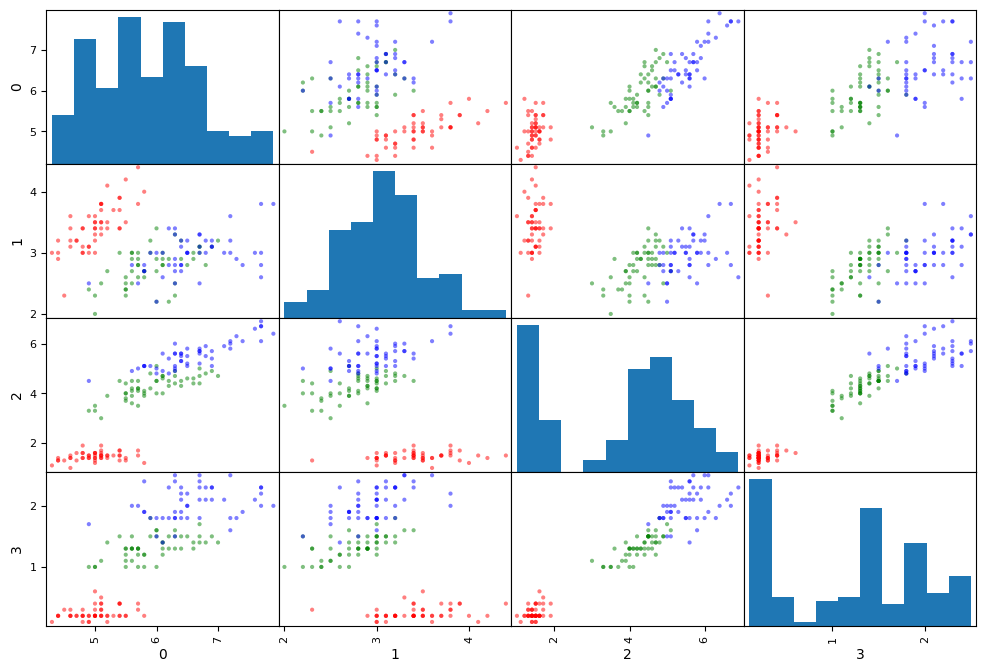

In [13]:
df=pd.DataFrame(iris.data)
colMap={0:"red",1:"green",2:"blue"}
cols=list(map(lambda x:colMap.get(x),iris.target))
scatter_matrix(df,  diagonal='hist',c=cols,figsize = (12,8))
fig1 = plt.gcf()
from google.colab import files
plt.savefig("plotiris.pdf")
files.download("plotiris.pdf")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Confusion Matrix:
 [[ 8  2  0]
 [ 0  7  2]
 [ 0  1 10]]
Accuracy Score: 0.8333333333333334


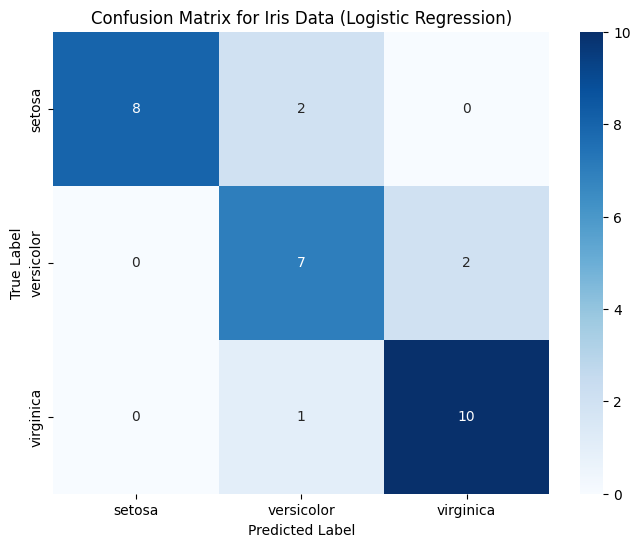

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Ladda iris-datasetet och definiera X och y
iris = load_iris()
X = iris["data"][:, 0:1]  # sepal length
y = iris["target"]        # y = 0, 1, or 2

# Dela upp data i tränings- och testmängder
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skapa och träna modellen
softmaxmodel = LogisticRegression(multi_class="multinomial", solver='lbfgs', max_iter=200)
softmaxmodel.fit(X_train, y_train)

# Gör förutsägelser på testdatan
y_pred = softmaxmodel.predict(X_test)

# Beräkna förvirringsmatris och noggrannhet
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Skriv ut resultaten
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy)

# Visualisera förvirringsmatrisen med en värmekarta
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris Data (Logistic Regression)')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

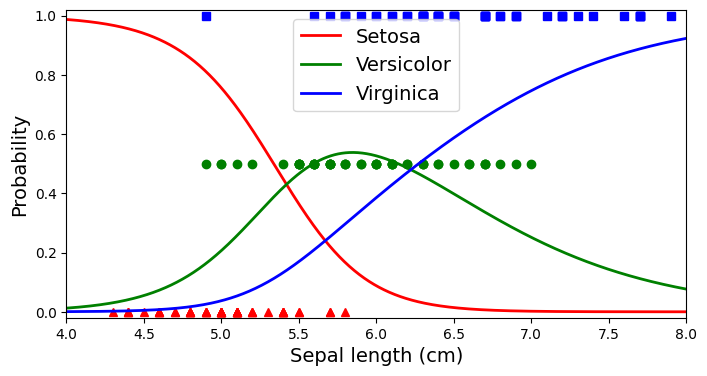

In [41]:
# Plot Setosa probability versus Sepal Length
Xnew = np.linspace(4,8,1000).reshape(-1,1)
yproba = softmaxmodel.predict_proba(Xnew)

plt.figure(figsize=(8, 4))
plt.plot(X[y==2], 0.5*y[y==2], "bs")
plt.plot(X[y==1], 0.5*y[y==1], "go")
plt.plot(X[y==0], y[y==0], "r^")
plt.plot(Xnew,yproba[:,0],"r-",linewidth=2,label = "Setosa")
plt.plot(Xnew,yproba[:,1],"g-",linewidth=2,label = "Versicolor")
plt.plot(Xnew,yproba[:,2],"b-",linewidth=2,label = "Virginica")
plt.xlabel("Sepal length (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.axis([4, 8, -0.02, 1.02])

#plt.savefig("plotiris3.pdf")
files.download("plotiris3.pdf")

In [7]:
X2 = iris["data"][:, (0,2)]  # petal length, petal width
y = iris["target"]

softmaxmodel2 = LogisticRegression(multi_class="multinomial",C=5)
softmaxmodel2.fit(X2, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=5, multi_class='multinomial')

(4.0, 8.0, 1.0, 7.0)

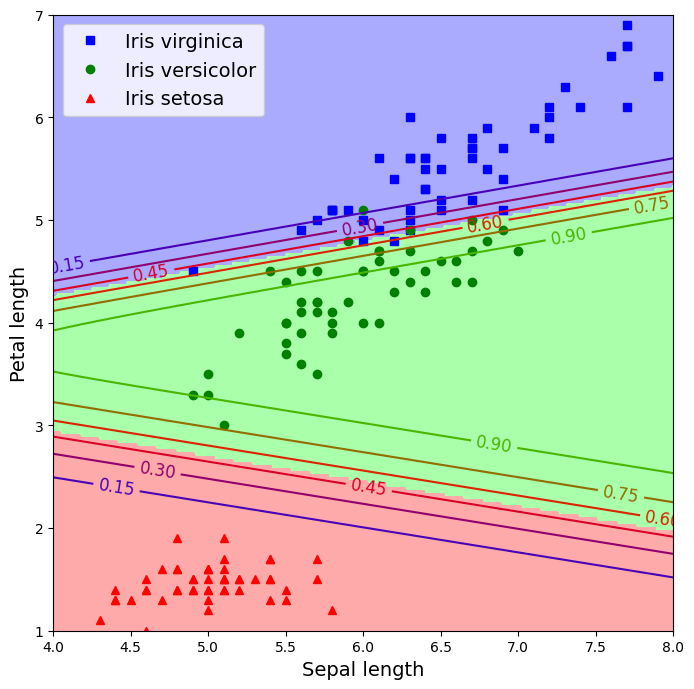

In [8]:
x0, x1 = np.meshgrid(
        np.linspace(4, 8, 500).reshape(-1, 1),
        np.linspace(1, 7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmaxmodel2.predict_proba(X_new)
y_predict = softmaxmodel2.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(8, 8))
plt.plot(X2[y==2, 0], X2[y==2, 1], "bs", label="Iris virginica")
plt.plot(X2[y==1, 0], X2[y==1, 1], "go", label="Iris versicolor")
plt.plot(X2[y==0, 0], X2[y==0, 1], "r^", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#ffaaaa','#aaffaa','#aaaaff'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Sepal length", fontsize=14)
plt.ylabel("Petal length", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([4, 8, 1, 7])
#plt.savefig("plotiris4.pdf")
#files.download("plotiris4.pdf")